# Gradient Boosting For Regression

### [scikit-learn Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

Gradient boosting Regression calculates the difference between the current prediction and the known correct target value.
This difference is called residual. After that Gradient boosting Regression trains a weak model that maps features to that residual. This residual predicted by a weak model is added to the existing model input and thus this process nudges the model towards the correct target. Repeating this step again and again improves the overall model prediction.

In [96]:
# Dependencies and packages
%reload_ext lab_black
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from joblib import dump
from joblib import load
import os
import matplotlib.pyplot as plt

In [97]:
# train data
train_path = os.path.join("../data/fish_participant.csv")
train_df = pd.read_csv(train_path)
# test data
test_path = os.path.join("../data/fish_holdout_demo.csv")
test_df = pd.read_csv(test_path)

In [98]:
X_train = train_df[["Height", "Width", "Length3", "Length2"]].values
y_train = train_df["Weight"].values

In [99]:
gbreg = GradientBoostingRegressor()
gbreg.fit(X_train, y_train)

GradientBoostingRegressor()

In [100]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbreg.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
best_n_estimators

98

In [101]:
gbreg = GradientBoostingRegressor(
    n_estimators=best_n_estimators,
    max_depth=6,
    min_samples_split=2,
    learning_rate=0.1,
    loss="ls",
)
gbreg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=98)

In [102]:
X_test = test_df[["Height", "Width", "Length3", "Length2"]].values
y_test = test_df["Weight"].values

In [103]:
print("Feature Importances")
print(gbreg.feature_importances_)

Feature Importances
[0.00849554 0.75202058 0.21822702 0.02125686]


In [104]:
y_pred = gbreg.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.006705267531472973


In [105]:
print("R-squared for Train: %.2f" % gbreg.score(X_train, y_train))
print("R-squared for Test: %.2f" % gbreg.score(X_test, y_test))

R-squared for Train: 1.00
R-squared for Test: 1.00


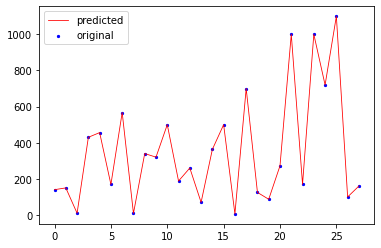

In [106]:
# plot
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()